In [ ]:
import pandas as pd

In [2]:
mapping_df = pd.read_csv("./src_data/mapping.csv")
mapping_objs = set(mapping_df['mapping'])
len(mapping_objs)

FileNotFoundError: [Errno 2] No such file or directory: './src_data/mapping.csv'

In [ ]:
with open('need_seg_objs') as f:
    nd_seg_objs = [x.strip() for x in f.readlines()]

In [61]:
len(nd_seg_objs)

NameError: name 'nd_seg_objs' is not defined

In [62]:
[x for x in mapping_objs if x not in nd_seg_objs]

NameError: name 'mapping_objs' is not defined

In [63]:
[x for x in nd_seg_objs if x not in mapping_objs]

NameError: name 'nd_seg_objs' is not defined

In [64]:
sorted(nd_seg_objs)

NameError: name 'nd_seg_objs' is not defined

In [33]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    


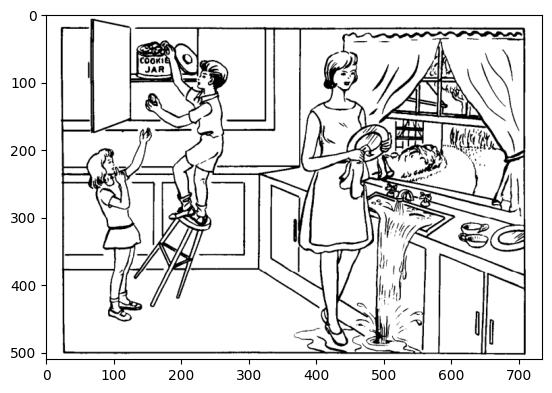

In [2]:
image = cv2.imread('./images/cookie.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image)
plt.axis('on')
plt.show()

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "../segment-anything/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"  # or  "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [5]:
predictor.set_image(image)

In [6]:
import os
extracted_masks = [x[: -4] for x in os.listdir("./images/segment_images/")]
[x for x in sorted(nd_seg_objs) if x not in extracted_masks][:]

NameError: name 'nd_seg_objs' is not defined

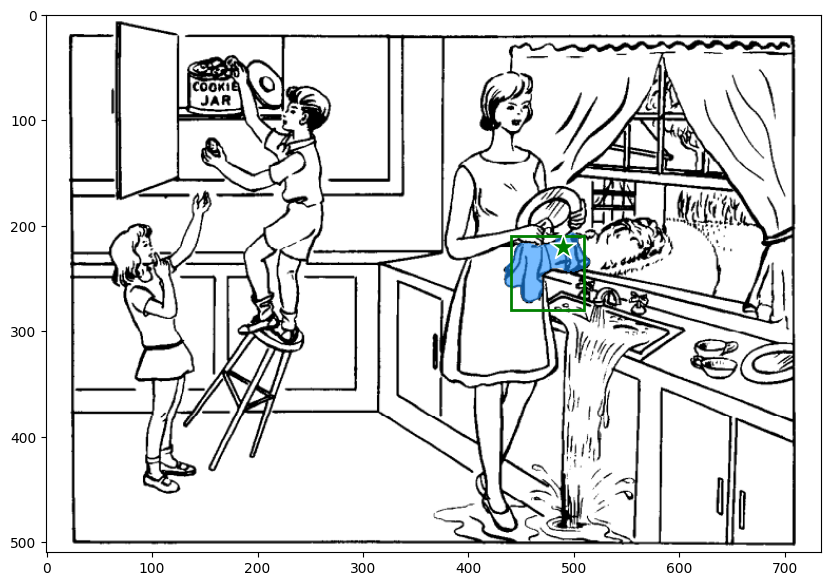

In [24]:
input_box = np.array([440, 210, 510, 280])
input_point = np.array([[490, 220]])
input_label = np.array([1])
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,  
    box=input_box,
    multimask_output=False,
)
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [10]:
merged_mask = np.logical_or(masks[1].cpu(), masks[0].cpu())

IndexError: index 1 is out of bounds for axis 0 with size 1

In [250]:
merged_mask = np.logical_or(masks[2].cpu(), merged_mask)

In [25]:
mask_id = 0
mask = masks[mask_id]
# mask = merged_mask
h, w = mask.shape[-2:]
mask_image = mask.reshape(h, w, 1)

In [26]:
mask_image.shape

(510, 735, 1)

In [27]:
img = np.uint8(mask_image * 255)
cv2.imwrite('./images/segment_images/towel.png', img)

True

dish_2.png
dish_3.png
lid.png
curtain.png
plant.png
garage.png
mother.png
kids.png
sink.png
floor.png
girl.png
window.png
towel.png
cookie.png
boy.png
jar.png
path.png
water.png
yard.png
cupboard_3.png
cupboard_1.png
cupboard_2.png
stool.png


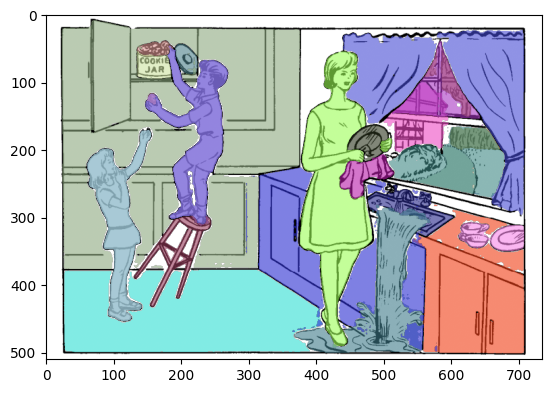

In [34]:
plt.figure()
plt.imshow(image)
from PIL import Image
import os
# 提取所有的蒙版，并上色
for file in os.listdir("./images/segment_images/"):
    fp = "./images/segment_images/" + file
    # plt.imshow(image)
    # 加载灰度图片
    img = Image.open(fp).convert('L')  # 确保图片是灰度格式
    # 将图片转换为 numpy 数组
    image_array = np.array(img)
    # 将特定灰度值转换为 True，其他为 False
    mask_array = (image_array == 255)
    show_mask(mask_array, plt.gca(), random_color=True)
    print(file)
    plt.axis('on')
plt.show()

In [21]:
input_boxes = torch.tensor([
	        [20, 20, 400, 380],
	        [150, 300, 250, 380],
            # [560, 50, 580, 100],
            # [560, 50, 580, 100],
	    ], device=predictor.device)
transformed_boxes = predictor.transform.apply_boxes_torch(input_boxes, image.shape[:2])
masks, _, _ = predictor.predict_torch(
    point_coords=None,
    point_labels=None,
    boxes=transformed_boxes,
    multimask_output=False,
)
print(masks.shape)  # x H x W

plt.figure(figsize=(10, 10))
plt.imshow(image)
for mask in masks:
    show_mask(mask.cpu().numpy(), plt.gca(), random_color=False)
for box in input_boxes:
    show_box(box.cpu().numpy(), plt.gca())
plt.axis('off')
plt.show()

NameError: name 'torch' is not defined

In [248]:
masks.shape

torch.Size([3, 1, 510, 735])

In [490]:
merged_mask = np.logical_or(mask1, masks[0])

In [481]:
# merged_mask = np.logical_or(masks[0].cpu(), masks[1].cpu())

In [576]:
mask_id = 0
mask = masks[mask_id]
# mask = merged_mask
h, w = mask.shape[-2:]
mask_image = mask.reshape(h, w, 1)

In [ ]:
fp = "./src_data/images/segment_images/" + file
# 加载灰度图片
img = Image.open(fp).convert('L')  # 确保图片是灰度格式
# 将图片转换为 numpy 数组
image_array = np.array(img)
# 将特定灰度值转换为 True，其他为 False
mask_array = (image_array == 255)

# 将MASK与原图组合 --> 图片特征

In [2]:
# 统计一下样本中的最大词频
import pandas as pd
from tqdm import tqdm
nd = pd.read_csv("./final/normal.csv")[['sample', 'label', 'object', 'group']]
ad = pd.read_csv("./final/abnormal.csv")[['sample', 'label', 'object', 'group']]

df = pd.concat([nd, ad])

In [9]:
# 替换， 删除
alter_df = pd.read_csv("./src_data/mapping.csv")
alter_object_dict = {(row['object'], row['group']): row['mapping'] for idx, row in alter_df.iterrows()}

substrings_to_remove = ['bird', 'mop', 'dish_1', 'corner', 'house', 'wall', 'button',
                       'building', 'the living room', 'room', 'kitchen', 'roof', 'birds', 'dishes']
mapping_objects = []
missing_objs = []

for _, row in tqdm(df.iterrows()):
    sid = row['sample']
    objs = row['object'].split(", ")
    groups = row['group'].split(", ")

    alter_obj = [] 
    
    for obj, group in zip(objs, groups):
        obj, group = obj.strip(), group.strip()
        try:
            tmp_obj = alter_object_dict[(obj, group)]
        except:
            if obj not in substrings_to_remove:
                missing_objs.append(obj)
                print((obj, group), "未找到对应的替换名称")
            continue;
        # try:
        #     if group not in ['group1', 'group2', 'group3', 'group4']:
        #         tmp_group = alter_group_dict[(obj, group)]
        #     else:
        #         tmp_group = group
        # except:
        #     print((obj, group), "未找到对应的可替换Group")
        alter_obj.append(tmp_obj)
    mapping_objects.append(alter_obj)

549it [00:00, 15319.80it/s]


In [10]:
df.insert(4, 'mapping_objs', mapping_objects)

In [21]:
df.to_csv("./final/data.csv", index=False)

In [21]:
image.shape

(510, 735, 3)

## 统计最大词频并上色

In [57]:
len(all_objs)

23

In [58]:
all_objs

['dish_2',
 'dish_3',
 'lid',
 'curtain',
 'plant',
 'garage',
 'mother',
 'kids',
 'sink',
 'floor',
 'girl',
 'window',
 'towel',
 'cookie',
 'boy',
 'jar',
 'path',
 'water',
 'yard',
 'cupboard_3',
 'cupboard_1',
 'cupboard_2',
 'stool']

In [66]:
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from PIL import Image
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import matplotlib.cm as cm
import math

image = cv2.imread('../src_data/images/cookie.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
all_objs = [x[:-4] for x in os.listdir("./images/segment_images/")]

# def show_mask(mask, ax, color_value):
#     color = np.array([30/255, 144/255, 255/255, color_value])
#     h, w = mask.shape[-2:]
#     mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
#     ax.imshow(mask_image)
#     return mask_image

def show_mask(mask, ax, color_value, colormap):
    # 使用颜色映射将数值转换为颜色
    # 使用颜色映射将数值转换为颜色
    color = np.array(colormap(color_value))  # 将颜色转换为 NumPy 数组
    # print(color)
    # color[3] = 0.95 * color_value + 0.05  # 设置透明度，使得低注意力值也可见
    color[3] = min(1.0, color_value * 1.1)  # 设置透明度，保持原始线条
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * np.array(color).reshape(1, 1, -1)
    ax.imshow(mask_image)
    return mask_image

def enhanced_frequency(counter, alpha=2):
    total = sum(counter.values())
    base_freqs = {k: v / total for k, v in counter.items()}
    
    # 应用幂函数增大差异
    powered_freqs = {k: v**alpha for k, v in base_freqs.items()}
    
    # 重新归一化
    sum_powered = sum(powered_freqs.values())
    return {k: v / sum_powered for k, v in powered_freqs.items()}

def show_image(original_img, objs, sample):
    plt.figure(figsize=(7.35, 5.1))
    plt.imshow(original_img)
    # 提取所有的蒙版，并上色
    obj_num = len(objs)
    α = 2
    # obj_color = {k: np.log(v + 1) / np.log(obj_num) for k, v in Counter(objs).items()}
    obj_color = {k: np.log(1 + α * v) / np.log(1 + α * obj_num) for k, v in Counter(objs).items()}
    max_num = max(Counter(objs).values())
    # obj_color = {k: v / obj_num for k, v in Counter(objs).items()}
    # obj_color = enhanced_frequency(Counter(objs), 1.2)
    # obj_color.update({
    #     k: 0
    #     for k in all_objs if k not in obj_color.keys()
    # })

    

    
    print(Counter(objs), obj_num)
    print(obj_color)
    print(max(obj_color.values()), min(obj_color.values()))
    # if max(obj_color.values())
    # print()
    # return ;
    colormap = cm.get_cmap('jet')  # 使用 'jet' 热图

    for k, v in obj_color.items():
        fp = "../src_data/images/segment_images/" + k + ".png"
        # 加载灰度图片
        img = Image.open(fp).convert('L')  # 确保图片是灰度格式
        # 将图片转换为 numpy 数组
        image_array = np.array(img)
        # 将特定灰度值转换为 True，其他为 False
        mask_array = (image_array == 255)
        mask_array = show_mask(mask_array, plt.gca(), v, colormap)
        
        plt.axis('off')
    if not os.path.exists("./images/new/masked_imgs/"):
        os.makedirs("./images/new/masked_imgs/")
    plt.savefig(f"./images/new/masked_imgs/{sample}.png", bbox_inches = 'tight')
    plt.show()

In [2]:
df = pd.read_csv("./final/data.csv")

In [3]:
"""
{'mother': 0.09302325581395349, 'boy': 0.2558139534883721, 'girl': 0.20930232558139536, 'jar': 0.046511627906976744, 'cupboard_1': 0.023255813953488372, 'cookie': 0.046511627906976744, 'stool': 0.023255813953488372, 'dish_2': 0.023255813953488372, 'water': 0.023255813953488372, 'sink': 0.023255813953488372, 'curtain': 0.046511627906976744, 'garage': 0.023255813953488372, 'plant': 0.046511627906976744, 'path': 0.023255813953488372, 'dish_3': 0.046511627906976744, 'window': 0.023255813953488372, 'cupboard_3': 0.023255813953488372, 'lid': 0, 'kids': 0, 'floor': 0, 'towel': 0, 'yard': 0, 'cupboard_2': 0}
0.2558139534883721 0"""

"\n{'mother': 0.09302325581395349, 'boy': 0.2558139534883721, 'girl': 0.20930232558139536, 'jar': 0.046511627906976744, 'cupboard_1': 0.023255813953488372, 'cookie': 0.046511627906976744, 'stool': 0.023255813953488372, 'dish_2': 0.023255813953488372, 'water': 0.023255813953488372, 'sink': 0.023255813953488372, 'curtain': 0.046511627906976744, 'garage': 0.023255813953488372, 'plant': 0.046511627906976744, 'path': 0.023255813953488372, 'dish_3': 0.046511627906976744, 'window': 0.023255813953488372, 'cupboard_3': 0.023255813953488372, 'lid': 0, 'kids': 0, 'floor': 0, 'towel': 0, 'yard': 0, 'cupboard_2': 0}\n0.2558139534883721 0"

0it [00:00, ?it/s]/tmp/ipykernel_3553851/4202295354.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('jet')  # 使用 'jet' 热图


243-0
245-0
245-1
245-2
248-0
248-1
248-2
255-0
255-1
256-0
256-1
256-2
266-0
266-1
266-2
267-0
267-2
274-0
274-1
274-2
275-0
275-1
280-0
280-1
280-2
292-1
295-0
295-1
296-0
296-1
296-2
297-1
297-2
298-1
299-1
302-0
304-1
304-2
318-0
318-1
318-2
322-1
322-2
323-0
323-1
332-0
336-1
340-0
612-0
627-0
631-0
661-0
668-0
678-0
684-0
686-0
688-0
691-0
709-0
709-2
208-2
209-1
209-2
209-3
210-1
210-2
211-1
211-2
225-0
225-2
227-0
227-1
229-1
229-2
232-0
232-1
242-0
242-1
242-2
002-0
002-1
002-2
002-3
006-2
006-3
006-4
013-0
013-2
013-3
013-4
015-0
015-1
015-2
015-3
015-4
017-4
021-0
021-1
021-2
021-3
021-4
022-0
022-1
022-2
028-1
028-4
034-0
034-1
034-2
034-3
034-4
042-1
042-2
042-3
042-4
045-0
045-2
045-3
052-0
052-2
054-0
055-0
056-0
056-3
056-4
059-2
059-3
059-4
068-0
068-2
068-3
071-0
071-1
071-2
071-3
071-4
073-0
073-1
073-3
086-0
086-1
086-2
086-3
086-4
092-0
092-1
092-2
092-3
093-0
093-1
096-1
096-2
105-0
105-1
105-2
107-1
107-2
109-1
109-3
109-4
113-0
113-1
113-2
113-3
114-0
114-1
114-

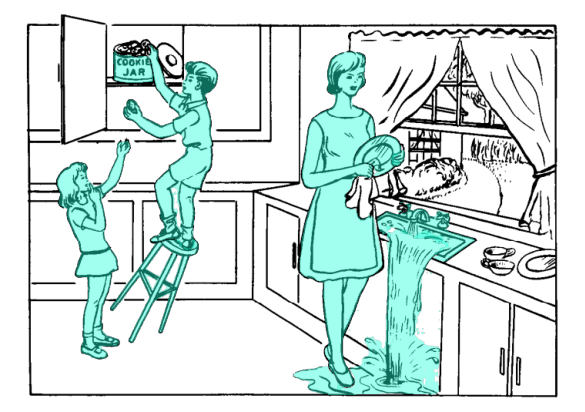

549it [00:01, 353.08it/s]

016-4
018-0
023-0
023-2
024-1
024-2
029-0
029-1
030-0
030-1
033-0
033-1
033-2
033-3
033-4
035-0
035-1
039-0
043-0
046-0
046-2
049-0
049-1
050-0
051-0
051-1
051-2
051-3
053-1
057-0
057-1
057-2
058-0
058-1
058-3
058-4
061-0
061-1
065-0
065-1
065-2
066-0
067-1
067-2
070-2
076-0
076-2
076-4
078-0
078-1
087-1
089-0
091-0
091-1
091-2
094-1
094-2
094-3
097-1
120-0
120-1
120-2
120-3
120-4
122-0
122-1
125-0
127-0
134-0
134-1
134-2
134-3
144-0
144-1
148-0
154-0
154-1
157-0
157-1
157-2
164-1
164-2
164-3
168-0
168-1
172-1
172-2
172-3
173-1
178-0
178-1
181-0
181-1
181-2
181-3
183-0
183-1
183-2
183-3
184-0
184-1
184-2
203-0
203-1
515-1
526-1
527-0
527-1
528-0
529-0
530-0
539-0
544-0
544-1
551-0
559-0
562-0
563-0
573-0
578-0
579-0
580-0
581-0
585-0
587-0
591-0
592-0
594-0
595-0
598-0
601-0
607-0
609-0
610-0
615-0
620-0
624-0
635-0
636-0
639-0
640-0
642-0
648-0
650-0
651-0
656-0
657-0
660-0
663-0
672-0
674-0
676-0
681-0
689-0
690-0
695-0
698-0
702-0
703-0
704-0
705-0
707-0
711-0
714-0
205-1
206-0
207-

In [4]:
for _, row in tqdm(df.iterrows()):
    sample = row['sample']
    print(sample)
    # print(row['mapping_objs'])
    objs = eval(row['mapping_objs'].replace('kids', "boy', 'girl"))
    if "016-3" in sample:
        show_image(image, objs, sample)

In [6]:
np.log(1 + 1 * 2) / np.log(1 + 16)

0.3877619350384901

In [46]:
# 调整图片大小 224 * 224
src_img = cv2.imread('../result.png')
tar_img = cv2.resize(src_img, (224,224), interpolation=cv2.INTER_CUBIC)
cv2.imwrite('lena2.jpg', tar_img)

True

In [44]:
def ResziePadding(img, fixed_side=224):	
    h, w = img.shape[0], img.shape[1]
    scale = max(w, h)/float(fixed_side)   # 获取缩放比例
    new_w, new_h = int(w/scale), int(h/scale)
    resize_img = cv2.resize(img, (new_w, new_h))    # 按比例缩放
    
    # 计算需要填充的像素长度
    if new_w % 2 != 0 and new_h % 2 == 0:
        top, bottom, left, right = (fixed_side - new_h) // 2, (fixed_side - new_h) // 2, (fixed_side - new_w) // 2 + 1, (
            fixed_side - new_w) // 2
    elif new_w % 2 == 0 and new_h % 2 != 0:
        top, bottom, left, right = (fixed_side - new_h) // 2 + 1, (fixed_side - new_h) // 2, (fixed_side - new_w) // 2, (
            fixed_side - new_w) // 2
    elif new_w % 2 == 0 and new_h % 2 == 0:
        top, bottom, left, right = (fixed_side - new_h) // 2, (fixed_side - new_h) // 2, (fixed_side - new_w) // 2, (
            fixed_side - new_w) // 2
    else:
        top, bottom, left, right = (fixed_side - new_h) // 2 + 1, (fixed_side - new_h) // 2, (fixed_side - new_w) // 2 + 1, (
            fixed_side - new_w) // 2
    # 填充图像
    pad_img = cv2.copyMakeBorder(resize_img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[255,255,255])
    return pad_img

In [45]:
from tqdm import tqdm

In [46]:
for filename in tqdm(os.listdir("./images/new/masked_imgs/")):
    src_img = cv2.imread("./images/new/masked_imgs/" + filename)
    tar_img = ResziePadding(src_img)
    output_dir = "./images/new/resized_img_white/"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    print(cv2.imwrite("./images/new/resized_img_white/" + filename, tar_img))

  6%|▌         | 32/549 [00:00<00:03, 154.22it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 12%|█▏        | 64/549 [00:00<00:03, 156.46it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 17%|█▋        | 96/549 [00:00<00:02, 157.12it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 23%|██▎       | 128/549 [00:00<00:02, 157.68it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 29%|██▉       | 160/549 [00:01<00:02, 157.89it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 32%|███▏      | 176/549 [00:01<00:02, 156.74it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 38%|███▊      | 208/549 [00:01<00:02, 152.42it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 44%|████▎     | 240/549 [00:01<00:02, 148.48it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 50%|████▉     | 272/549 [00:01<00:01, 150.02it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 55%|█████▌    | 303/549 [00:01<00:01, 146.77it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 61%|██████    | 335/549 [00:02<00:01, 150.04it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 67%|██████▋   | 367/549 [00:02<00:01, 153.47it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 73%|███████▎  | 399/549 [00:02<00:00, 151.67it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 79%|███████▊  | 431/549 [00:02<00:00, 150.78it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 84%|████████▍ | 463/549 [00:03<00:00, 155.01it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 90%|█████████ | 495/549 [00:03<00:00, 157.10it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


 96%|█████████▌| 527/549 [00:03<00:00, 158.17it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


100%|██████████| 549/549 [00:03<00:00, 154.01it/s]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [112]:
cv2.imwrite('lena2.jpg', tar_img)

True